# Email Spam Dtection (ML)

In [25]:
# import the data tools
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [10]:
# import the models from sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [60]:
# import the model Evalution 
from sklearn.metrics import classification_report 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Preprocessing Text Data Using TF_IDFVectorizer

In [12]:
# first import the dataset using pandas
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# now check data set
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
#now check null values 
df.isna().sum()

Category    0
Message     0
dtype: int64

# Plots class distribution and data for Visulize data

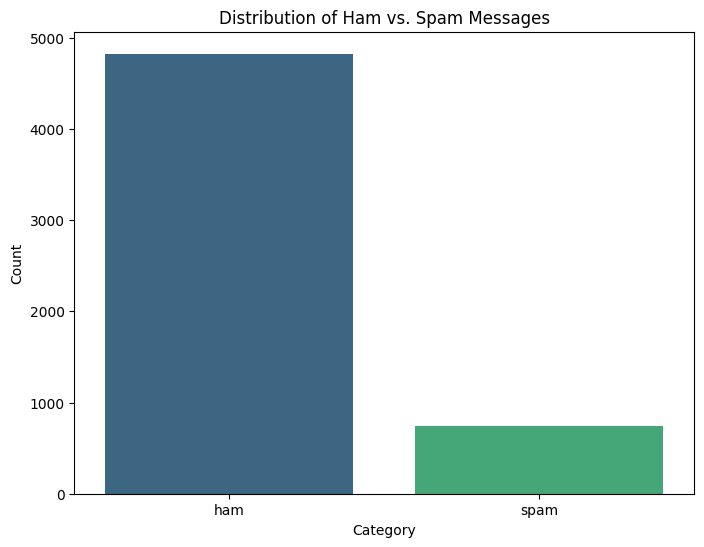

In [69]:
# --- Plot 1: Class Distribution ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df,hue='Category',palette='viridis',)
plt.title('Distribution of Ham vs. Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig('class_distribution.png')

In [16]:
# Add word count column
df['Word_Count'] = df['Message'].apply(lambda x: len(str(x).split()))


In [19]:
df['Word_Count']

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: Word_Count, Length: 5572, dtype: int64

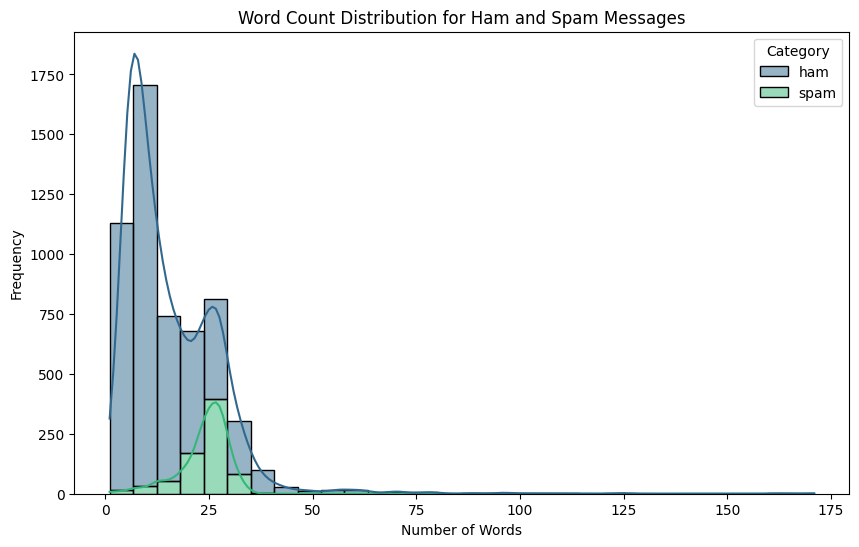

In [70]:
# --- Plot 2: Word Count Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Word_Count', hue='Category', multiple='stack', bins=30, palette='viridis',kde=True)
plt.title('Word Count Distribution for Ham and Spam Messages')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.savefig('word_Count_distribution.png')

# Now creating label/target column for spam or not with Discreate Value

In [28]:
df['Labels']=df['Category'].map({'ham':0,'spam':1})

In [29]:
df.head()


,Category,Message,Word_Count,Labels
0,ham,"Go until jurong point, crazy.. Available only ...",20,0
1,ham,Ok lar... Joking wif u oni...,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,1
3,ham,U dun say so early hor... U c already then say...,11,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,0


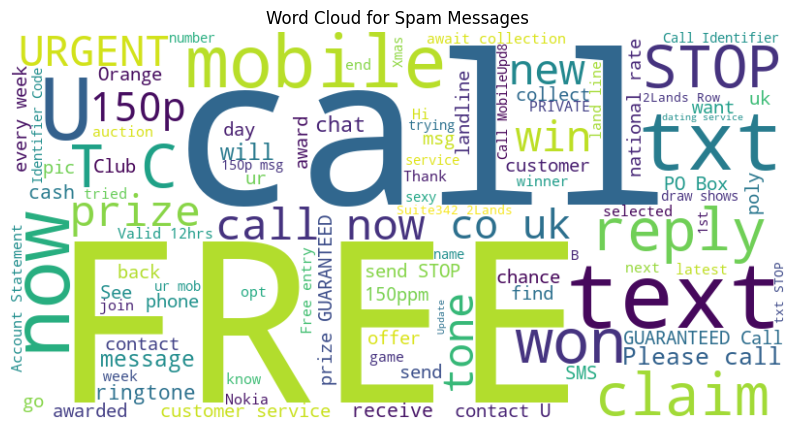

In [71]:
# --- Plot 3: Word Clouds ---
# Combine text for spam and ham
spam_text = ' '.join(df[df['Labels'] == 1]['Message'].astype(str))
ham_text = ' '.join(df[df['Labels'] == 0]['Message'].astype(str))

# Word cloud for spam
plt.figure(figsize=(10, 6))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(spam_text)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.savefig('word_cloud.png')

In [31]:
# Now Split Data inot Features and labels
X=df['Message']
y=df['Labels']

# split the data into Train Test Split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# TF_IDF_Vectorization

In [33]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)
# transform x data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Now Appplying Machine Learning

In [46]:
# first definig the models i have
models={'RandomForestClassifier':RandomForestClassifier(),
       'Logistic_Regression':LogisticRegression(),
       'Navie-Bayes':MultinomialNB()}

In [47]:
def fit_and_evalute(models,X_train,X_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        # fit the models
        model.fit(X_train,y_train)
        # now add to the 
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
    

In [48]:
models_scores=fit_and_evalute(models,X_train_tfidf,X_test_tfidf,y_train,y_test)

In [49]:
models_scores

{'RandomForestClassifier': 0.9820627802690582,
 'Logistic_Regression': 0.9748878923766816,
 'Navie-Bayes': 0.9775784753363229}

In [50]:
# plot the models score plot
model_score=pd.DataFrame(models_scores,index=['accuracy'])

<Axes: >

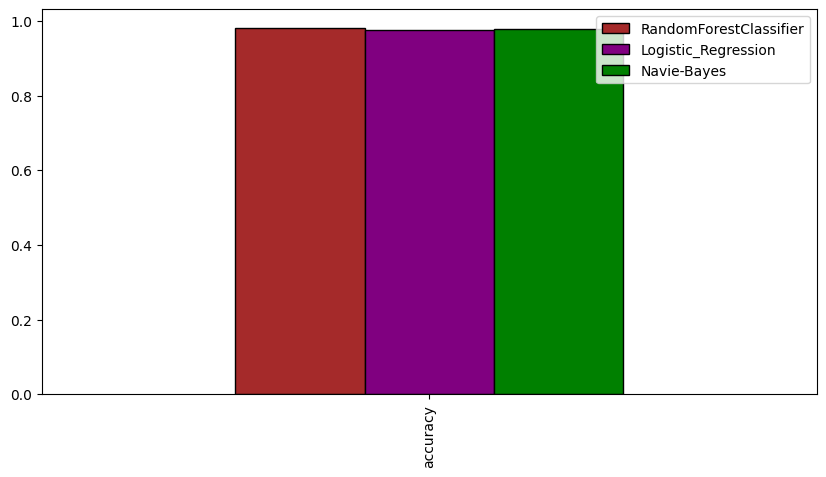

In [51]:
model_score.plot(kind='bar',figsize=(10,5),color=['brown','purple','green'],edgecolor='black')

In [52]:
# using MultinomialNB
multinomialNB=MultinomialNB()

In [53]:
multinomialNB.fit(X_train_tfidf,y_train)

MultinomialNB()

In [54]:
# get the score 
multinomialNB.score(X_test_tfidf,y_test)

0.9775784753363229

In [56]:
y_predict=multinomialNB.predict(X_test_tfidf)

# Now Evaluate the Model Perfomance 

In [59]:
# first check the classification Report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [61]:
# now check the confusion matrix 
cm=confusion_matrix(y_test,y_predict)

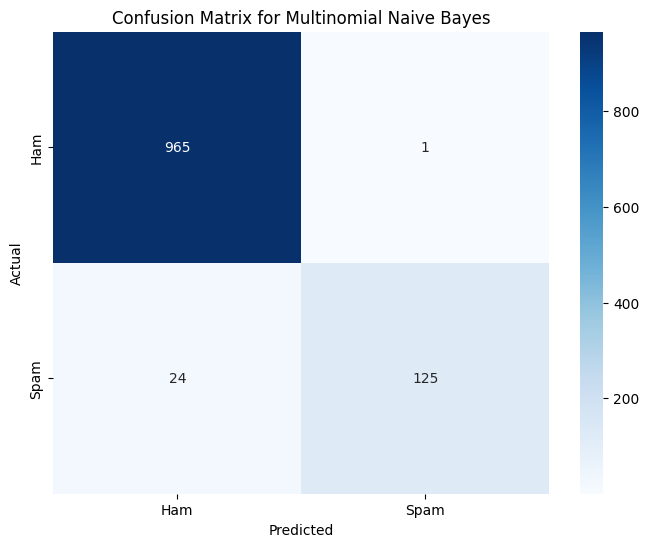

In [72]:
# now plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion_Matrix.png')

# Save the model file 

In [67]:
import pickle
with open('email_spam_detection_model','wb') as file:
    pickle.dump(multinomialNB,file)
print('Model Saved Successfully')

Model Saved Successfully


# now test single result

In [73]:
def predict_message(message, vectorizer, model):
    # Ensure the message is a string
    message = str(message)
    # Transform the message using the trained vectorizer
    message_tfidf = vectorizer.transform([message])
    # Predict the label (0 for ham, 1 for spam)
    prediction = model.predict(message_tfidf)[0]
    # Get probability of spam
    prob_spam = model.predict_proba(message_tfidf)[0][1]
    # Return result
    label = 'Spam' if prediction == 1 else 'Ham'
    return label, prob_spam

# Test a single message (replace with your own message)
test_message = "Free entry to win a prize! Click now!"
label, prob_spam = predict_message(test_message, vectorizer, multinomialNB)

# Print the result
print(f"Message: {test_message}")
print(f"Prediction: {label}")
print(f"Probability of Spam: {prob_spam:.4f}")

Message: Free entry to win a prize! Click now!
Prediction: Spam
Probability of Spam: 0.9111
